In [1]:
#Sentiment Analysis
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.tokenize import RegexpTokenizer  #for Extracting the terms with Particular Pattern
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer

amz_rev=pd.read_csv('C:/Users/91868/Desktop/Amazon_Reviews.csv')

amz_rev["Label"]=amz_rev["Label"].map({'__label__1 ':0,'__label__2 ':1})

from sklearn.model_selection import train_test_split

y=amz_rev['Label']
amz_rev.drop(columns='Label',inplace=True)
X_train,X_test,y_train,y_test=train_test_split(amz_rev,y,test_size=0.2,random_state=42)

#next we need to tokenize,stopwords removal, stemming/Lemmatization
from nltk.tokenize import RegexpTokenizer

tokenizer=RegexpTokenizer(r'\w+')
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()

def preprocessing(review):
    final_tokens=' '
    tokens=tokenizer.tokenize(review)
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    lemmas_tokens=[lemmatizer.lemmatize(pure_token) for pure_token in pure_tokens]
    final_tokens=final_tokens.join(lemmas_tokens)
    return final_tokens
X_train['Cleaned_text']=X_train['Review'].apply(preprocessing)

X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['Cleaned_text'])

X_train_Tfidf=vectorizer.transform(X_train['Cleaned_text'])

X_test_Tfidf=vectorizer.transform(X_test['Cleaned_text'])

from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt

#clf=MultinomialNB().fit(X_train_Tfidf,y_train)

clf=MultinomialNB()
clf.fit(X_train_Tfidf,y_train)

y_pred=clf.predict(X_test_Tfidf)
confusion_matrix(y_test,y_pred)

y_proba_pred=clf.predict_proba(X_test_Tfidf)[::,1]
fpr,tpr,thresholds=roc_curve(y_test,y_proba_pred)
plt.plot(fpr,tpr)

auc=roc_auc_score(y_test,y_proba_pred)
auc

D:\ANACONDA - PYTHON\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\ANACONDA - PYTHON\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.8640000000000001

D:\ANACONDA - PYTHON\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8720000000000001

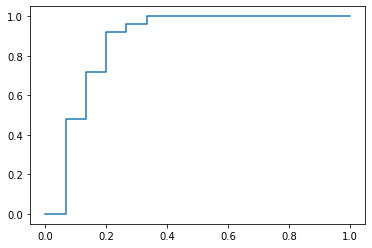

In [2]:
#Logistic Regression for the above

from sklearn.linear_model import LogisticRegression
rg=LogisticRegression()
rg.fit(X_train_Tfidf,y_train)

y_pred=rg.predict(X_test_Tfidf)
confusion_matrix(y_test,y_pred)

y_proba_pred=rg.predict_proba(X_test_Tfidf)[::,1]
fpr,tpr,thresholds=roc_curve(y_test,y_proba_pred)
plt.plot(fpr,tpr)

auc=roc_auc_score(y_test,y_proba_pred)
auc

In [5]:
print(X_train_Tfidf)

  (0, 2454)	0.13957303974704816
  (0, 2300)	0.1509447463657495
  (0, 2287)	0.2953441016354584
  (0, 2252)	0.07499455538794905
  (0, 2233)	0.12013297888044207
  (0, 2221)	0.2791460794940963
  (0, 2128)	0.09636959580678353
  (0, 2073)	0.1509447463657495
  (0, 2071)	0.1509447463657495
  (0, 2021)	0.11206462463253736
  (0, 1962)	0.2791460794940963
  (0, 1959)	0.1158096566733896
  (0, 1943)	0.1509447463657495
  (0, 1918)	0.13150468549914343
  (0, 1572)	0.12013297888044207
  (0, 1504)	0.13150468549914343
  (0, 1482)	0.1158096566733896
  (0, 1429)	0.09844803387848614
  (0, 1409)	0.11206462463253736
  (0, 1391)	0.1509447463657495
  (0, 1385)	0.1509447463657495
  (0, 1376)	0.12013297888044207
  (0, 1337)	0.1509447463657495
  (0, 1300)	0.13150468549914343
  (0, 1262)	0.1509447463657495
  :	:
  (158, 1974)	0.15884148835808132
  (158, 1958)	0.14687352786525884
  (158, 1825)	0.14212395789321705
  (158, 1776)	0.11328003041922845
  (158, 1589)	0.15884148835808132
  (158, 1528)	0.07623662097123925
  (